<a href="https://colab.research.google.com/github/Touza-Isaac/Prediction_sentiment/blob/main/Prediction_sentiment_produit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nous disposons d'un ensemble de données contenant des commentaires d'utilisateurs sur un site de commerce électronique.

Chaque commentaire est étiqueté comme positif (+) ou négatif (-) en fonction du sentiment exprimé.
**Travail a faire**:
Construire un modèle de classificationde texte pour prédire le sentiment des commentaires non étiquetés.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#charger les donnees du dataset
donnees = pd.read_csv("data_set.csv")
print("Apercu des données \n", donnees.head())


Apercu des données 
    Id_Commentaire                                       Commentaires  \
0               1            J'adore ce produit, il est incroyable !   
1               2            Super achat, je le recommande vivement.   
2               3                          Vous êtes vraiment cool !   
3               4     Ce produit répond parfaitement à mes attentes.   
4               5  Je suis impressionné par la qualité de cet art...   

  Sentiments  
0          +  
1          +  
2          +  
3          +  
4          +  


In [4]:
#Suppression de la colonne ID qui ne nous servira a rien
donnees = donnees.drop("Id_Commentaire", axis=1)
print("Apercu des données sans la colonne ID \n", donnees.head())


Apercu des données sans la colonne ID 
                                         Commentaires Sentiments
0            J'adore ce produit, il est incroyable !          +
1            Super achat, je le recommande vivement.          +
2                          Vous êtes vraiment cool !          +
3     Ce produit répond parfaitement à mes attentes.          +
4  Je suis impressionné par la qualité de cet art...          +


In [5]:
#Subdivision des variables en variable explicative(commentaires =X) et en variable a expliquée (Sentiments =y) 
X = donnees["Commentaires"]
y = donnees["Sentiments"]

In [6]:

#Compter les valeurs manquantes
print("Nombres de valeurs nulles \n", donnees.isnull().sum())


Nombres de valeurs nulles 
 Commentaires    0
Sentiments      0
dtype: int64


In [7]:
# 3. Subdivision des donnees en donnees d'entrainement(80%) et en donnees de test(20%)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.8, random_state=1)

In [8]:

#Importation des libraries necessaire pour la gestion du modele et du resultat
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [12]:
#Transformation des donnees en type de donnees gerable par le modele
#Remplacement Sentiments (- par 0 et + par 1)
donnees["Sentiments"] = donnees["Sentiments"].map({'-':0, '+':1})
print("Apercu des données preformatées \n", donnees.head())


Apercu des données preformatées 
                                         Commentaires  Sentiments
0            J'adore ce produit, il est incroyable !         NaN
1            Super achat, je le recommande vivement.         NaN
2                          Vous êtes vraiment cool !         NaN
3     Ce produit répond parfaitement à mes attentes.         NaN
4  Je suis impressionné par la qualité de cet art...         NaN


In [18]:
#Standardisation des donnees 
#Pre-traitement des textes
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
#Apprendre le vocabulaire des donnees d'entrainement
vect.fit(Xtrain)
#Examiner le vocabulaire entrainé
#vect.get_feature_names()

CountVectorizer()

In [19]:

#Transformer les donnees d'entrainement en une matrice document-terme
simple_train_doc = vect.transform(Xtrain)
print("Apercu des matrices document-termes créés \n", simple_train_doc)

#Transformer les donnees de test(en utilisant un vocabulaire adapté) en une matrice de termes de documents
simple_test_doc = vect.transform(Xtest)

#Initier un modele bayesien multinomial
model = MultinomialNB()

#Entrainement du modele
model.fit(simple_train_doc, Ytrain)


Apercu des matrices document-termes créés 
   (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (0, 12)	1
  (0, 17)	1
  (0, 26)	1
  (0, 49)	1
  (0, 57)	1
  (0, 75)	1
  (0, 81)	1
  (0, 89)	1
  (0, 94)	1
  (0, 97)	1
  (1, 10)	1
  (1, 17)	1
  (1, 33)	1
  (1, 36)	1
  (1, 49)	1
  (1, 50)	1
  (1, 51)	1
  (1, 73)	1
  (1, 80)	1
  (1, 82)	1
  (1, 104)	1
  (1, 109)	1
  :	:
  (17, 33)	1
  (17, 72)	1
  (17, 73)	1
  (17, 83)	1
  (18, 5)	1
  (18, 6)	1
  (18, 12)	1
  (18, 32)	1
  (18, 33)	1
  (18, 48)	1
  (18, 101)	1
  (19, 10)	1
  (19, 17)	1
  (19, 44)	1
  (19, 52)	1
  (19, 55)	1
  (19, 56)	1
  (19, 70)	1
  (19, 73)	1
  (19, 74)	1
  (19, 77)	1
  (19, 90)	1
  (19, 93)	2
  (19, 103)	1
  (19, 106)	1


MultinomialNB()

In [20]:
#Prediction des nouvelles valeurs
y_pred = model.predict(simple_test_doc)

In [21]:
#Examine class de distribution
Ytest.value_counts()

+    41
-    39
Name: Sentiments, dtype: int64

In [22]:
#5. Generer la matrice de confusion construit
y_pred = model.predict(simple_test_doc)
confusion = confusion_matrix(Ytest, y_pred)
confusion

array([[34,  7],
       [16, 23]])

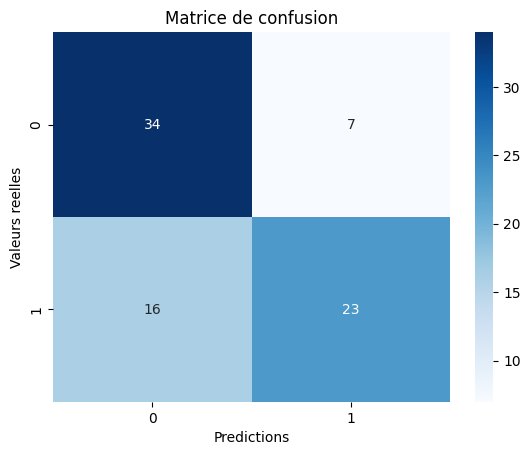

In [23]:
#Impression de la matrice de confusion et enregistrement sous forme d'image
sns.heatmap(confusion, annot=True, cmap="Blues")
plt.xlabel("Predictions")
plt.ylabel("Valeurs reelles")
plt.title("Matrice de confusion")
plt.savefig("Matrice_confusion.png")
plt.show()

In [24]:
#6. Impression du rapport de classification
print(classification_report(Ytest, y_pred, zero_division=1))

              precision    recall  f1-score   support

           +       0.68      0.83      0.75        41
           -       0.77      0.59      0.67        39

    accuracy                           0.71        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80



In [25]:
#Evaluation de la performance du modele
#Calcul de la precision des predictions
metrics.accuracy_score(Ytest, y_pred)

0.7125

In [26]:
#7. Utilisation du modèle entraîné pour prédire le sentiment des commentaires non étiqueté
new_comments = ["Ce produit est incroyable !", "Je suis déçu de mon achat",
                "Le service client est exceptionnel."," Vous êtes le meilleur"]
nouvelles_donnees = vect.transform(new_comments)
predictions = model.predict(nouvelles_donnees)
les_predictions = pd.DataFrame({'Commentaires':["Ce produit est incroyable !",
                                                  "Je suis déçu de mon achat.",
                                                  "Le service client est exceptionnel.",
                                                  " Vous êtes le meilleur"],
                                'Sentiments predits': predictions})
print(les_predictions)

                          Commentaires Sentiments predits
0          Ce produit est incroyable !                  +
1           Je suis déçu de mon achat.                  +
2  Le service client est exceptionnel.                  -
3                Vous êtes le meilleur                  -
